Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 24
         Gradient evaluations: 24


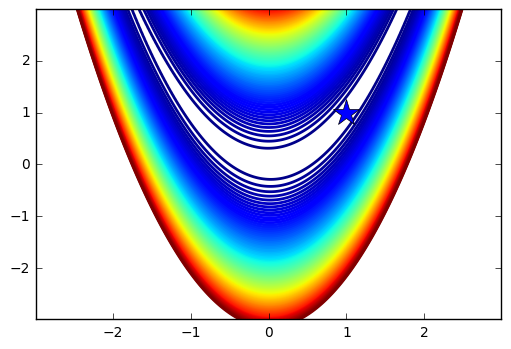

In [1]:
"""Part I: Unconstrained Optimization"""

import numpy as np
from scipy.optimize import minimize
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return (100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[0])**2.0)

# Rosenbrock gradient
def rosen_der(x):

    der = np.zeros(2)

    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[1] = 200*(x[1]-x[0]**2)
    return der

# initial pt for optimization
x0 = np.array([0.0,0.0])

# optimize!
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,options={'disp': True})




#########################################################

# post process
if (1==1):
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z = np.array(np.zeros((len(y),len(x))))
    for i in xrange(len(x)):
        for j in xrange(len(y)):
            loc_x = x[i]
            loc_y = y[j]

            loc = np.array([loc_x,loc_y])

            Z[j,i] = rosen(loc)

#     im = plt.imshow(Z, interpolation='bilinear', origin='lower',
#                 cmap=cm.viridis, extent=(-3, 3, -3, 3))
    levels = np.arange(0.0, 1000.0, 10.0)
    CS = plt.contour(Z, levels,
                     origin='lower',
                     linewidths=2,
                     extent=(-3, 3, -3, 3))
    #plt.clabel(CS, inline=10, fontsize=10)
    plt.plot(res.x[0],res.x[1],"*",markersize=20)
    plt.show()
    
    

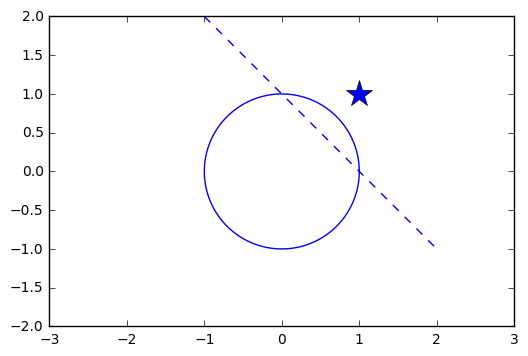

In [2]:
"""Part II: constrained optimization"""
"""How do the constraints look like?"""

# Inequality constraint
theta_array = np.linspace(0, 2.0*np.pi, 1000)

r = 1.0

x_list_ineq = []
y_list_ineq = []

for i in xrange(len(theta_array)):
    
    theta_loc = theta_array[i]
    
    x_loc = r * np.cos(theta_loc)
    y_loc = r * np.sin(theta_loc)
    
    x_list_ineq.append(x_loc)
    y_list_ineq.append(y_loc)

    
x_list_eq = [-1, 2]
y_list_eq = [2, -1]
    

plt.figure()
plt.plot(x_list_ineq, y_list_ineq, 'b-')
plt.plot([1], [1], "*",markersize=20)
plt.plot(x_list_eq, y_list_eq, 'b--')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axes().set_aspect('equal', 'datalim')
plt.show()




Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.14560701804
            Iterations: 10
            Function evaluations: 15
            Gradient evaluations: 10


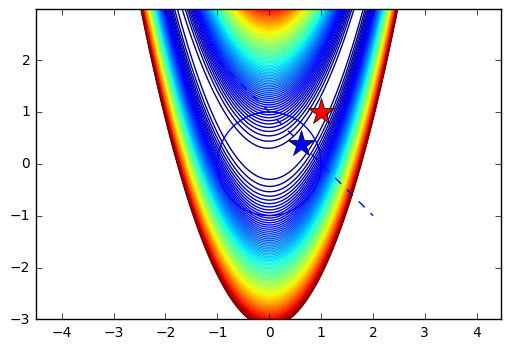

In [3]:
"""Part II: constrained optimization"""
"""Main"""

import numpy as np
from scipy.optimize import minimize
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return (100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[0])**2.0)

# Rosenbrock gradient
def rosen_der(x):

    der = np.zeros(2)

    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[1] = 200*(x[1]-x[0]**2)
    return der

# constraints

def cons_f():
    
    dict1 = dict([('type', 'ineq'),
          ('fun' , lambda x: np.array([1-x[0]**2-x[1]**2])),
          ('jac' , lambda x: np.array([-x[0]*2.0, -x[1]*2.0]))])
    dict2 = dict([('type', 'eq'),
          ('fun' , lambda x: np.array([x[0] + x[1]-1.0])),
          ('jac' , lambda x: np.array([1.0,1.0]))])
    
    return [dict1, dict2]
    
# cons = [{'type': 'ineq',
#           'fun' : lambda x: np.array([1-x[0]**2-x[1]**2]),
#           'jac' : lambda x: np.array([-x[0]*2.0, -x[1]*2.0])}, 
#         {'type': 'eq',
#           'fun' : lambda x: np.array([x[0] + x[1]-1.0]),
#           'jac' : lambda x: np.array([1.0,1.0])}
#          ]
cons = cons_f()

# initial point
x0 = np.array([0.0,0.0])


# optimize!
res = minimize(rosen, x0, jac=rosen_der,constraints=cons, method='SLSQP', options={'disp': True})
post_process_flag = 1








#########################################################



# post process
if (post_process_flag==1):
    # ball constraint
    theta = np.linspace(0,2.0*np.pi,100)
    x_cir = []
    y_cir = []
    for i in xrange(len(theta)):
        x_cir.append(np.cos(theta[i]))
        y_cir.append(np.sin(theta[i]))
    plt.plot(x_cir,y_cir, 'b-')

    # line constraint
    x_list_eq = [-1, 2]
    y_list_eq = [2, -1]
    plt.plot(x_list_eq,y_list_eq, 'b--')

    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z = np.array(np.zeros((len(y),len(x))))
    for i in xrange(len(x)):
        for j in xrange(len(y)):
            loc_x = x[i]
            loc_y = y[j]

            loc = np.array([loc_x,loc_y])

            Z[j,i] = rosen(loc)

    levels = np.arange(0, 1000, 10)
    CS = plt.contour(X, Y, Z,levels)
    #plt.clabel(CS, inline=100, fontsize=10)
    plt.plot(res.x[0],res.x[1],"b*",markersize=20)
    plt.plot([1],[1],"r*",markersize=20)
    plt.axes().set_aspect('equal', 'datalim')
    plt.show()

Iteration limit exceeded    (Exit mode 9)
            Current function value: 4.51538161366
            Iterations: 101
            Function evaluations: 1809
            Gradient evaluations: 101


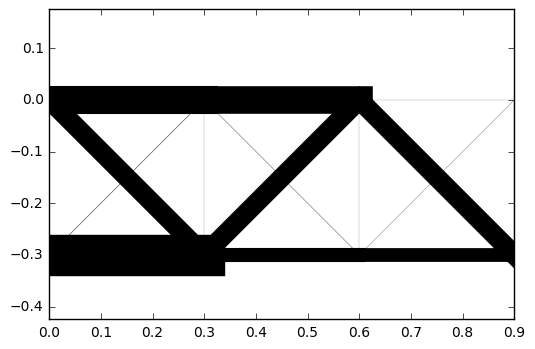

('areas', array([ 2.02029203,  1.38804233,  0.03187462,  2.98114075,  0.01      ,
        1.98492296,  0.02401753,  1.39461781,  1.01562462,  0.01      ,
        0.01      ,  1.40056116,  0.0168983 ,  0.99038216,  0.01      ]), 'stress', array([ -9.99188967,  -9.99849568,   8.27618947,  10.00069017,
        -3.45341291,  -9.99938008,  -8.95020231,   9.98637317,
         9.99582004,   5.52931466,  -9.67077454,  -9.99982763,
         8.09344318,   9.99946553,  -9.67077454]))


In [4]:
"""Part III. Truss optimization"""

"import external fortran code"
import lib 
from scipy.sparse.linalg import gmres, LinearOperator, aslinearoperator
import scipy 

"area->disp, disp->stress"

def get_matrix(areas):
    
    global nodes
    global elements
    global cons
    global E
    
    num_nodes = nodes.shape[0]
    num_elems = elements.shape[0]
    num_cons = cons.shape[0]


    nnz = 16 * num_elems + 2 * 2 * num_cons

    data, rows, cols = lib.getmtx2d(num_nodes, num_elems, num_cons, nnz,
                                    E, nodes, elements+1, areas, cons+1)

    size = 2 * num_nodes + 2 * num_cons

    mat = scipy.sparse.csc_matrix((data, (rows, cols)),
                                  shape=(size, size))

    return mat

def solve_nonlinear(areas):
    
    global rhs
    
    mat = get_matrix(areas)
    lu = scipy.sparse.linalg.splu(mat)

    disp_aug = new_gmres(mat, rhs, lu)
    
    disp = disp_aug[:-4]
    
    return disp
    
def new_gmres(mat, rhs, lu):
    
    size = len(rhs)
    
    A = aslinearoperator(mat)
    M = LinearOperator((size, size), dtype=float, matvec=lu.solve)
    sol, info = gmres(A, rhs, M=M, tol=1e-12)
    return sol

def getStress(disp):
    
    global nodes
    global elements
    global E

    num_nodes = nodes.shape[0]
    num_elems = elements.shape[0]
    num_cons = cons.shape[0]
    
    nnz = 2 * 2 * num_elems
    
    data, rows, cols = lib.getstressder2d(num_nodes, num_elems, nnz,
                                            E, nodes, elements+1)
    
    mat = scipy.sparse.csc_matrix((data, (rows, cols)),
                                               shape=(num_elems, 2 * num_nodes))
    
    stress = mat.dot(disp)
    
    return stress

#############################################################

def getStressFromArea(areas):
    
    disp = solve_nonlinear(areas)
    stress = getStress(disp)
    
    return stress

def getVolume(areas):
    
    global length_list
    
    V = 0
    
    for i in xrange(len(areas)):
        
        V += areas[i] * length_list[i]
        
    return V


def KSstressConMax(areas):
    
    global sigma_max
    
    rho = 1000
    
    stress = getStressFromArea(areas)
    
    elem_N = len(stress)
    
    gi_max_list = []
    
    for i in xrange(elem_N):
        
        gi_max = - sigma_max + stress[i]
        
        gi_max_list.append(gi_max)
        
    i_max = np.argmax(gi_max_list)
    
    sum_exp_max = 0.0
    
    for i in xrange(elem_N):
        
        sum_exp_max += np.exp(rho * (gi_max_list[i] - gi_max_list[i_max]))
        
    sum_exp_max_log = np.log(sum_exp_max)
        
    return -(gi_max_list[i_max] + 1.0 / rho * sum_exp_max_log)
        
    
def KSstressConMin(areas):
    
    global sigma_min
    
    rho = 1000
    
    stress = getStressFromArea(areas)
    
    elem_N = len(stress)
    
    gi_min_list = []
    
    for i in xrange(elem_N):
        
        gi_min = sigma_min - stress[i]
        
        gi_min_list.append(gi_min)
        
    i_max = np.argmax(gi_min_list)
    
    sum_exp_min = 0.0
    
    for i in xrange(elem_N):
        
        sum_exp_min += np.exp(rho * (gi_min_list[i] - gi_min_list[i_max]))
        
    sum_exp_min_log = np.log(sum_exp_min)
        
    return -(gi_min_list[i_max] + 1.0 / rho * sum_exp_min_log)

        
con1 = dict([('type', 'ineq'),('fun',lambda x: KSstressConMax(x))])
con2 = dict([('type', 'ineq'),('fun',lambda x: KSstressConMin(x))])


    

"case set up"

unit_length = 0.3
pattern_N = 3

# Youngs modulus
E = 1.0

# yield stress
sigma_min = -10.0
sigma_max = 10.0

# nodes
nodes = []
nodes.append([0.0, 0.0])
nodes.append([0.0, -unit_length])
for i in xrange(pattern_N):
    
    x_loc = unit_length * (i + 1)
    
    nodes.append([x_loc, 0.0])
    nodes.append([x_loc, -unit_length])    
    
nodes = np.array(nodes)

# elements
elements = []

for i in xrange(pattern_N):
    
    node_N_0 = i * 2
    
    elem1 = [node_N_0,     node_N_0 + 2]
    elem2 = [node_N_0,     node_N_0 + 3]
    elem3 = [node_N_0 + 1, node_N_0 + 2]
    elem4 = [node_N_0 + 1, node_N_0 + 3]
    elem5 = [node_N_0 + 2, node_N_0 + 3]
    
    elements.append(elem1)
    elements.append(elem2)
    elements.append(elem3)
    elements.append(elem4)
    elements.append(elem5)

elements = np.array(elements)

# constraints
cons = [0, 1]
cons = np.array(cons)

length_list = []

for i in xrange(len(elements)):
    
    node1_ind = elements[i, 0]
    node2_ind = elements[i, 1]
    
    xy1 = nodes[node1_ind, :]
    xy2 = nodes[node2_ind, :]
    
    dx = xy1 - xy2
    l_loc = np.sqrt(np.transpose(dx).dot(dx))
    
    length_list.append(l_loc)


# load
size = nodes.shape[0] * 2 + 2 * 2
rhs = np.matrix( np.zeros((size, 1)) )

rhs[-5, 0] = 10.0

# initialization
elem_N = len(elements)
areas_0 = np.zeros(elem_N) + 1.0


# stress constraints
elem_n = elements.shape[0]

#optimization_cons_list = getStressCon(elem_n, sigma_min, sigma_max)
optimization_cons_list = [con1, con2]
#optimization_cons_list = con1

# bnds for area
lb = 0.01
ub = None
bnds = []
for i in xrange(elem_n):
    bnds.append((lb, ub))
    

res = minimize(getVolume, areas_0, constraints=optimization_cons_list,bounds=bnds, method='SLSQP', options={'disp': True})

# postprocess
def plot(sol, elems, nodes):

    for i in xrange(len(sol)):
        sol_loc = sol[i]

        ind_node_1 = elems[i,0]
        ind_node_2 = elems[i,1]


        x1 = nodes[ind_node_1,0]
        y1 = nodes[ind_node_1,1]

        x2 = nodes[ind_node_2,0]
        y2 = nodes[ind_node_2,1]

        x = [x1, x2]
        y = [y1, y2]


        plt.plot(x,y,'-k',
                #c=colorVal)
                linewidth=sol_loc*10)

        i += 1

    plt.axes().set_aspect('equal', 'datalim')
    
    plt.show()
    
plot(res.x, elements, nodes)

print("areas", res.x, "stress", getStressFromArea(res.x))




[1, 2]

1.0

2.6881171418161356e+43